# SELF-REGULARIZED MLP WITH SELU ACTIVATION FUNCTION

_Experiments if an MLP using SELU activation performs better than that of using RELU._

It first creates a neural network for Fashion MNIST with 100 hidden layers using the RELU activation function and then it compares its performance over validation set with a network of same architecture but using SELU activation.

In [1]:
# Imports required modules and methods

import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


2025-01-24 20:26:00.853039: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-24 20:26:00.853857: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 20:26:00.857969: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-24 20:26:00.870054: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737730560.890982  280797 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737730560.89

## Loading & Preparing Data Sets

In [2]:
# Downloads the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Checks the shape of the train and test datasets
print("Train set shape:", X_train_full.shape)

# Checks the shape of the train and test datasets
print("Train set shape:", X_test.shape)


Train set shape: (60000, 28, 28)
Train set shape: (10000, 28, 28)


In [3]:
# Splits train set further to seperate validation set from it
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
# Checks the data type of the data set
X_train_full.dtype

dtype('uint8')

In [4]:
# Standardizes train and validation set by scaling the inputs with mean 0 and standard deviation 1

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

## Modeling

**Creates a neural network with 100 hidden layers using the RELU activation function.**

In [8]:
# Sets the global random seed for operations that rely on a random seed
tf.random.set_seed(42)

# Builds a sequential model
model = tf.keras.Sequential()

# Adds into model a layer that flattens 2D input [e.g. 2D image in this experiment]
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Adds into model 100 dense layers each with 100 outputs and RELU activation function
# As recommended for "RELU", "he" initialization strategy with "normal" distribution was set for weight initialization
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))

# Finally, adds into model a 10-output dense layer with "softmax" activation
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compiles the model with appropriate loss function with specific learning rate, optimizer and metric
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),      # Sets relatively lower learning rate
    metrics=["accuracy"]
    )

In [9]:
# Fits the model over 5 epochs with validation set
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_val_scaled, y_val))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.1774 - loss: 2.0434 - val_accuracy: 0.3134 - val_loss: 1.4820
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3630 - loss: 1.4244 - val_accuracy: 0.5394 - val_loss: 1.0980
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5701 - loss: 1.0547 - val_accuracy: 0.7062 - val_loss: 0.7896
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6727 - loss: 0.8552 - val_accuracy: 0.7106 - val_loss: 0.8430
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7166 - loss: 0.7701 - val_accuracy: 0.7096 - val_loss: 0.8241


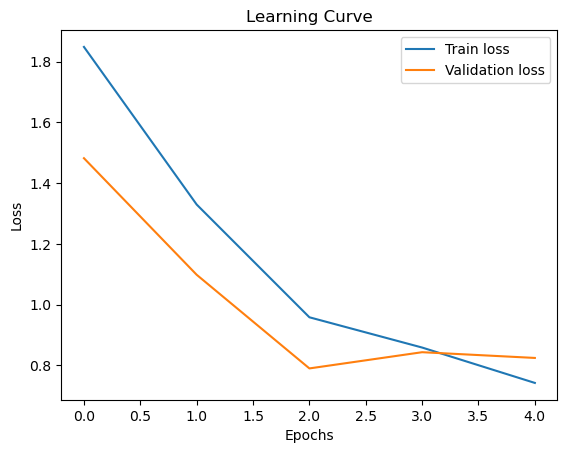

In [10]:
# Visualizes the traing and validation performance over loss function

plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curve")
plt.show()

It was observed that the model started getting overfitted after 3rd epochs as the training loss kept reducing and the validation loss increasing. 

**Now, creates the same neural network but using the SELU activation function this time.**

In [5]:
# Clears the name counters and 
# sets the global random seed for operations that rely on a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# Builds a sequential model
model = tf.keras.Sequential()

# Adds into model a layer that flattens 2D input [e.g. 2D image in this experiment]
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Adds into model 100 dense layers each with 100 outputs and SELU activation function
# As recommended for "SELU", "lecun" initialization strategy with "normal" distribution was set for weight initialization
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

# Finally, adds into model a 10-output dense layer with "softmax" activation
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compiles the model with appropriate loss function with specific learning rate, optimizer and metric
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),      # Sets relatively lower learning rate
    metrics=["accuracy"]
    )

/home/pradip/anaconda3/envs/keras3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-24 20:26:46.069958: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Then, fits the model over 5 epochs with validation set
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_val_scaled, y_val))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3737 - loss: 1.6880 - val_accuracy: 0.6522 - val_loss: 0.9564
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7105 - loss: 0.8123 - val_accuracy: 0.7724 - val_loss: 0.6611
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7587 - loss: 0.6696 - val_accuracy: 0.7974 - val_loss: 0.5783
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7299 - loss: 0.7572 - val_accuracy: 0.7642 - val_loss: 0.6633
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7414 - loss: 0.7103 - val_accuracy: 0.8094 - val_loss: 0.5416


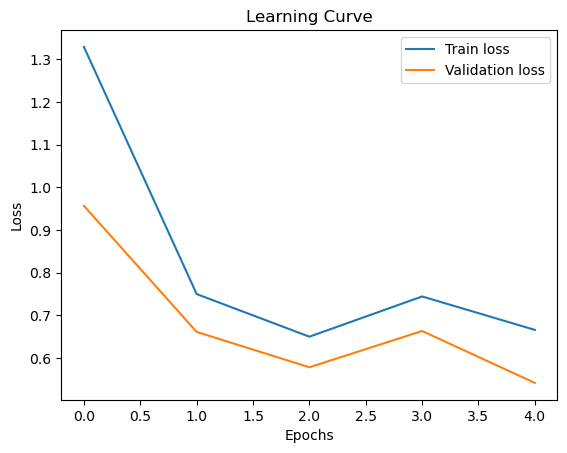

In [7]:
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curve")
plt.show()

It was observed that both training ans validation loss come down till the end of 5 epochs. It was due to SELU activalation function that makes the network self-regularized.